<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula_11_regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

## Objetivos

Com este código, você irá:
- Implementar o método de Regressão Logística "na mão" e comparar com os resultados obtidos por meio da biblioteca Scikit-Learn.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Conjunto de dados

O conjunto de dados usado nesse código é o mesmo já utilizado na atividade de programação anterior.

In [2]:
X_trein = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_trein = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

Plotando os dados:

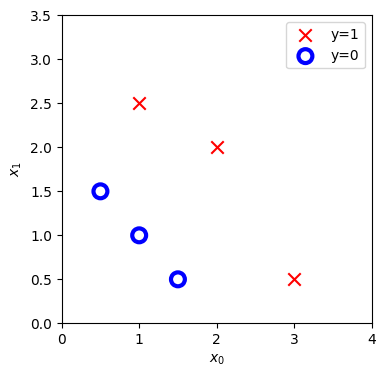

In [3]:
pos = y_trein == 1 # identifica os elementos em y que são iguais a 1
neg = y_trein == 0 # identifica os elementos em y que são iguais a 0

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X_trein[pos,0], X_trein[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_trein[neg,0], X_trein[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.legend()
plt.show()

## Plotando a Fronteira de Decisão para o modelo com $w_0=1$, $w_1=1$ e $b=-3$

Na atividade anterior, vimos que a Fronteira de decisão para esse modelo é conforme abaixo:

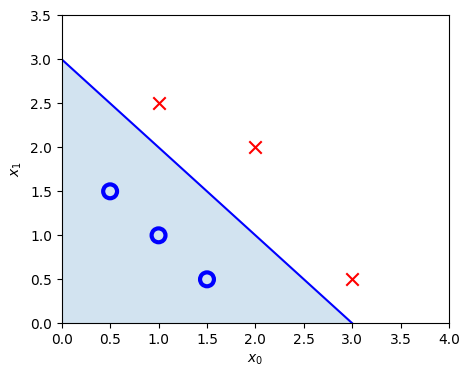

In [4]:
# Escolhendo valores entre 0 e 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plotando a Fronteira de Decisão
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5]) # limitando o display do gráfico

# Preenche a região abaixo da linha
ax.fill_between(x0,x1, alpha=0.2)

# Plotando os dados também:
ax.scatter(X_trein[pos,0], X_trein[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_trein[neg,0], X_trein[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Uma outra possibilidade de modelo: modelo com $w_0=1$, $w_1=1$ e $b=-4$

Nesse caso, a fronteira de decisão torna-se $x_0 + x_1 = 4$. Abaixo plotamos ela.

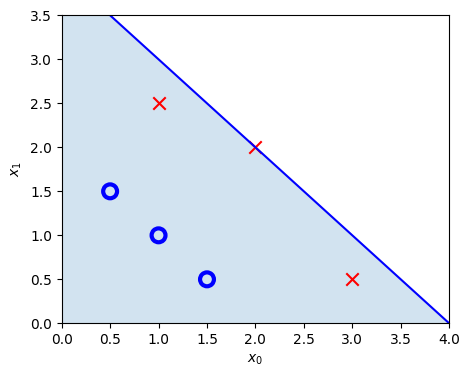

In [5]:
# Escolhendo valores entre 0 e 6
x0 = np.arange(0,6)

x1 = 4 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plotando a Fronteira de Decisão
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5]) # limitando o display do gráfico

# Preenche a região abaixo da linha
ax.fill_between(x0,x1, alpha=0.2)

# Plotando os dados também:
ax.scatter(X_trein[pos,0], X_trein[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_trein[neg,0], X_trein[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

Qual modelo você acha que apresentará **um menor custo** $J(\mathbf{w},b)$?
- O modelo com $w_0=1$, $w_1=1$ e $b=-3$?
- Ou o modelo com $w_0=1$, $w_1=1$ e $b=-4$?

Vamos checar isso implementando a função custo para Regressão Logística

## Função Custo

Na Regressão Logística, a função custo tem a forma

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ perda(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

onde
* $perda(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ é o custo associado a uma única amostra de dados, que é:

    $$perda(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  m é o número de amostras de treinamento e:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$


#### Descrição do Código abaixo:

A função `calcula_custo_RegLog` abaixo faz um loop passando por todas as amostras e calculando a perda para cada exemplo.
O total então é computado e depois divido por m.

Note que as variáveis X e y não são escalares mas sim matrizes de shape ($m, n$) e ($𝑚$,) respectivamente, onde  $𝑛$ é o número de características e $𝑚$ é o número de amostras de treinamento.


In [6]:
def calcula_custo_RegLog(X, y, w, b):
    """
    Calcula a função custo para Regressão Logística

    Argumentos:
      X (ndarray (m,n)): Dados, m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros do modelo
      b (escalar)      : parâmetro do modelo

    Retorna:
      custo (escalar): custo
    """

    m = X.shape[0]
    custo = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoide(z_i)
        custo +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    custo = custo / m
    return custo

def sigmoide(z):
    """
    Calcula o valor sigmoide de z

    Argumento:
        z (ndarray): Um escalar ou numpy array de qualquer tamanho.

    Retorna:
        g (ndarray): sigmoid(z), com o mesmo shape de z

    """

    g = 1/(1+np.exp(-z))

    return g



### Checando nossa implementação calculando o custo para o modelo com $w_0=1$, $w_1=1$ e $b=-3$

In [7]:
w_tmp = np.array([1,1])
b_tmp = -3
print(calcula_custo_RegLog(X_trein, y_trein, w_tmp, b_tmp))

0.36686678640551745


**Valor Esperado**: 0.3668667864055175

### Checando nossa implementação calculando o custo para o modelo com $w_0=1$, $w_1=1$ e $b=-4$

In [8]:
w_tmp = np.array([1,1])
b_tmp = -4
print(calcula_custo_RegLog(X_trein, y_trein, w_tmp, b_tmp))

0.5036808636748461


**Valor Esperado**: 0.5036808636748461

# Método do Gradiente: Calculando o nosso próprio modelo


Lembre-se que o Método do Gradiente implementa a seguinte lógica:
$$\begin{align*}
&\text{repetir até convergir:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Onde cada iteração performa atualização simultanea de $w_j$ para todo $j$ e para $b$, onde
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* $f_{\mathbf{w},b}(x^{(i)})$ é a previsão feita pelo modelo, sendo $y^{(i)}$ o alvo
* Para o modelo de Regressão Logística:
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    sendo $g(z)$ a função sigmoide:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

## Implementação do Método do Gradiente:

O algoritmo do Método do Gradiente possui duas componentes:
- O loop que implementa a equação (1) acima. Essa é a função metodo_do_gradiente_RegLog abaixo.
- O cálculo do gradiente atual, dado pelas equações (2) e (3) acima. Essa é a função calcula_gradiente_RegLog abaixo.

#### Cálculo do gradiente: descrição do código:
Implementa as equações (2) e (3) acima para todo $w_j$ e $b$.

Há muitas formas para se implementar isso. Abaixo fazemos da seguinte maneira:
- Inicializamos as variáveis para acumular `dj_dw` e `dj_db`
- Para cada exemplo:
    - Calcula-se o erro para esse exemplo, $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - Para cada valor de entrada $x_{j}^{(i)}$ nesse exemplo,  
        - multiplica o erro pela entrada  $x_{j}^{(i)}$, e adiciona para o elemento correspondente de `dj_dw`. (Equação 2 acima)
    - adiciona o erro para `dj_db` (Equação 3 acima)

- divide-se `dj_db` e `dj_dw` pelo número total de amostras (m)
- Note que $\mathbf{x}^{(i)}$ em Numpy é `X[i,:]` ou `X[i]`  e que $x_{j}^{(i)}$ é `X[i,j]`

In [9]:
def calcula_gradiente_RegLog(X, y, w, b):
    """
    Calcula Gradiente para Regressão Linear
    Argumentos:
      X (ndarray (m,n)): Dados, contendo m exemplos com n características
      y (ndarray (m,)) : valores alvo
      w (ndarray (n,)) : parâmetros w do modelo
      b (scalar)       : parâmetro b do modelo

    Retorna:
      dj_dw (ndarray (n,)): O gradiente da função custo com relação aos parâmetros w.
      dj_db (escalar):      O gradiente da função custo com relação ao parâmetro b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoide(np.dot(X[i],w) + b)          #(n,)(n,)=escalar
        err_i  = f_wb_i  - y[i]                       #escalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #escalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #escalar

    return dj_db, dj_dw

Checando a nossa implementação do gradiente:

In [10]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = calcula_gradiente_RegLog(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Valor esperado**
```
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

#### Método do Gradiente: descrição do código

O código que implementa a Equação (1) acima é fornecido abaixo. Tire um momento para entender o que está sendo calculado e como isso é feito.

In [11]:
def metodo_do_gradiente_RegLog(X, y, w_inicial, b_inicial, alpha, num_iters):
    """
    Performa Método do Gradiente para aprender theta. Atualiza theta ao longo de
    num_iters passos de iteração usando uma taxa de aprendizado alpha

    Argumentos
      X (ndarray (m,n))   : Dados, contendo m exemplos com n características
      y (ndarray (m,))    : valores alvo
      w_inicial (ndarray (n,)) : valores iniciais dos parâmetros w do modelo
      b_inicial (escalar)      : valor inicial do parâmetro b do modelo
      alpha (float)       : taxa de aprendizado
      num_iters (int)     : Número de iterações para o método do gradiente

    Retorna:
      w (ndarray (n,)) : Valores atualizados para os parâmetros w
      b (escalar)      : Valores atualizado para o parâmetro b
      """

    w = w_inicial
    b = b_inicial

    # Valores históricos
    J_his = []

    for i in range(num_iters):
        # Calculando o gradiente
        dj_db, dj_dw = calcula_gradiente_RegLog(X, y, w, b)

        # Atualizando os parâmetros com base em alpha e nos gradientes
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Salva J para cada iteração
        if i<100000:
            J_his.append( calcula_custo_RegLog(X, y, w, b) )

        # Armazena Custo de tempos em tempos para plotar depois
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteração {i:4d}: Custo {J_his[-1]}   ")

    return w, b, J_his         #retorna os valores finais w,b e J history para plotar curva de aprendizado


Vamos agora rodar a Regressão Logística para os nossos dados

In [12]:
w_tmp     = np.zeros_like(X_trein[0])
b_tmp     = 0.
alpha     = 0.1
iteracoes = 10000

w_final, b_final, _ = metodo_do_gradiente_RegLog(X_trein, y_trein, w_tmp, b_tmp, alpha, iteracoes)
print(f"\nparâmetros finais: w:{w_final}, b:{b_final}")


Iteração    0: Custo 0.684610468560574   
Iteração 1000: Custo 0.1590977666870457   
Iteração 2000: Custo 0.08460064176930078   
Iteração 3000: Custo 0.05705327279402531   
Iteração 4000: Custo 0.04290759421682   
Iteração 5000: Custo 0.03433847729884557   
Iteração 6000: Custo 0.02860379802212006   
Iteração 7000: Custo 0.02450156960879306   
Iteração 8000: Custo 0.02142370332569295   
Iteração 9000: Custo 0.019030137124109114   

parâmetros finais: w:[5.28123029 5.07815608], b:-14.222409982019837


**Note que o custo final é menor do que aquele que havia sido obtido com o modelo com $w_0=1$, $w_1=1$ e $b=-3$**

## Plotando os resultados do método do gradiente:

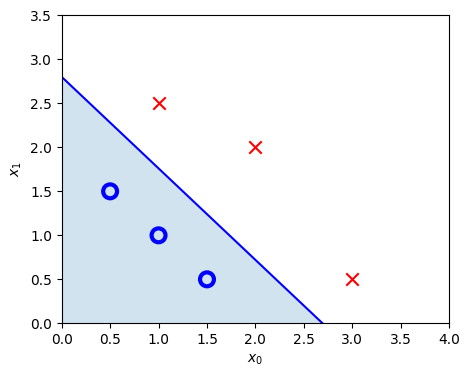

In [13]:
# Fronteira de decisão
x0 = -b_final/w_final[0]
x1 = -b_final/w_final[1]

fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plotando a Fronteira de Decisão
ax.plot([0,x0],[x1,0], c="b")
ax.axis([0, 4, 0, 3.5]) # limitando o display do gráfico

# Preenche a região abaixo da linha
ax.fill_between([0,x0],[x1,0], alpha=0.2)

# Plotando os dados também:
ax.scatter(X_trein[pos,0], X_trein[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_trein[neg,0], X_trein[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

# Usando a biblioteca Scikit-Learn e comparando os resultados

## Estimando o modelo:

O código abaixo importa a função [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) do scikit-learn. Você pode ajustar o modelo para os dados de treinamento chamando a função `fit`.

In [14]:
from sklearn.linear_model import LogisticRegression

modelo_RegLog = LogisticRegression()
modelo_RegLog.fit(X_trein, y_trein)

LogisticRegression()

## Fazendo previsões:

Você pode ver as previsões feitas por este modelo chamando a função `predict`.

In [15]:
y_pred = modelo_RegLog.predict(X_trein)

print("Previsão feita para os dados de treinamento:", y_pred)

Previsão feita para os dados de treinamento: [0 0 0 1 1 1]


## Calculando Taxa de acerto do modelo (acurácia)

Você pode calcular a taxa de acerto (acurácia) do modelo usando a função `score`. A acurácia corresponde ao percentual de amostras que foram corretamente classificadas pelo modelo.

In [16]:
print("Taxa de acerto para os dados de treinamento (%):", 100*modelo_RegLog.score(X_trein, y_trein))

Taxa de acerto para os dados de treinamento (%): 100.0


## Parabéns!

Com este código você implementou o algoritmo de Regressão Logística.